In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Downloads\iPhone\iPhonesAll.csv')
df

,Model Name,Rating,ROM,Display (cm),Chip Processor,Number of Ratings,Number of Reviews,Price(₹)
0,"APPLE iPhone 11 (Black, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
1,"APPLE iPhone 11 (White, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
2,"APPLE iPhone 13 (Midnight, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
3,"APPLE iPhone 13 (Green, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
4,"APPLE iPhone 11 (Black, 64 GB)",4.6,64,15.49,A13,200360.0,11406.0,37999
...,...,...,...,...,...,...,...,...
403,"APPLE iPhone 5C (Yellow, 8 GB)",3.9,8,10.16,NaN,1327.0,265.0,37500
404,"APPLE iPhone 5C (Green, 8 GB)",3.9,8,10.16,NaN,1327.0,265.0,37500
405,"APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)",4.5,128,17.02,A14,1270.0,103.0,95599
406,"APPLE iPhone 5s (Gold, 16 GB)",4.4,16,10.16,NaN,62762.0,7337.0,35000


# 3. Invalid Values

In [3]:
if df['Rating'].all()<0 & df['Rating'].all()>5:
    print(df[['Rating']])

In [4]:
if df['ROM'].all()<0 & df['ROM'].all()>256:
    print(df[['ROM']])

In [5]:
if df['Display (cm)'].all()>30.00:
    print(df[['Display (cm)']])

In [6]:
df['ROM'] = df.iloc[:,2].replace(1,1024)

# 4. Outliers using IQR

<Axes: >

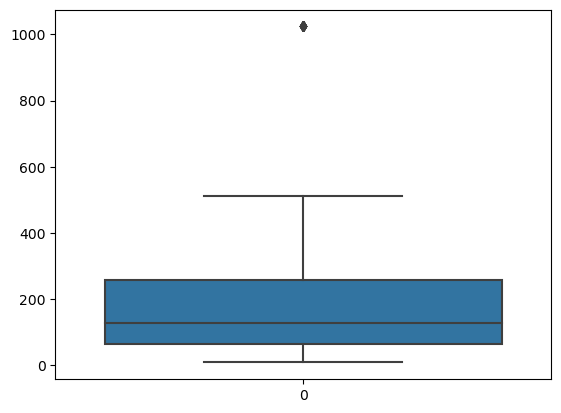

In [7]:
sns.boxplot(df['ROM'])

In [8]:
Q1 = df['ROM'].quantile(0.25)
Q3 = df['ROM'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['ROM'] >= lower_bound) & (df['ROM'] <= upper_bound)]

192.0


In [9]:
df

,Model Name,Rating,ROM,Display (cm),Chip Processor,Number of Ratings,Number of Reviews,Price(₹)
0,"APPLE iPhone 11 (Black, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
1,"APPLE iPhone 11 (White, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
2,"APPLE iPhone 13 (Midnight, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
3,"APPLE iPhone 13 (Green, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
4,"APPLE iPhone 11 (Black, 64 GB)",4.6,64,15.49,A13,200360.0,11406.0,37999
...,...,...,...,...,...,...,...,...
403,"APPLE iPhone 5C (Yellow, 8 GB)",3.9,8,10.16,NaN,1327.0,265.0,37500
404,"APPLE iPhone 5C (Green, 8 GB)",3.9,8,10.16,NaN,1327.0,265.0,37500
405,"APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)",4.5,128,17.02,A14,1270.0,103.0,95599
406,"APPLE iPhone 5s (Gold, 16 GB)",4.4,16,10.16,NaN,62762.0,7337.0,35000


`If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed`

In [10]:
df['ROM'].skew()

0.9023368806741444

<Axes: >

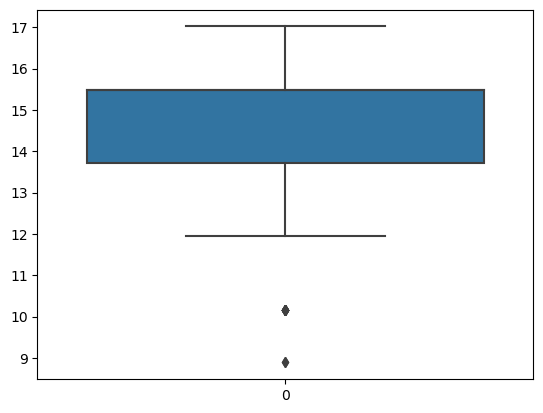

In [11]:
sns.boxplot(df['Display (cm)'])

In [12]:
Q1 = df['Display (cm)'].quantile(0.25)
Q3 = df['Display (cm)'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Display (cm)'] >= lower_bound) & (df['Display (cm)'] <= upper_bound)]

1.7699999999999996


In [13]:
df

,Model Name,Rating,ROM,Display (cm),Chip Processor,Number of Ratings,Number of Reviews,Price(₹)
0,"APPLE iPhone 11 (Black, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
1,"APPLE iPhone 11 (White, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
2,"APPLE iPhone 13 (Midnight, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
3,"APPLE iPhone 13 (Green, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
4,"APPLE iPhone 11 (Black, 64 GB)",4.6,64,15.49,A13,200360.0,11406.0,37999
...,...,...,...,...,...,...,...,...
397,"APPLE iPhone 12 mini (Purple, 64 GB)",4.5,64,13.72,A14,129311.0,10267.0,50999
398,"APPLE iPhone 12 Pro Max (Silver, 256 GB)",4.5,256,17.02,A14,1270.0,103.0,129900
399,"APPLE iPhone 11 Pro (Space Grey, 64 GB)",4.6,64,14.73,A13,8676.0,629.0,106600
405,"APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)",4.5,128,17.02,A14,1270.0,103.0,95599


`If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed`

In [14]:
df['Display (cm)'].skew()

-0.4015222698077083

<Axes: >

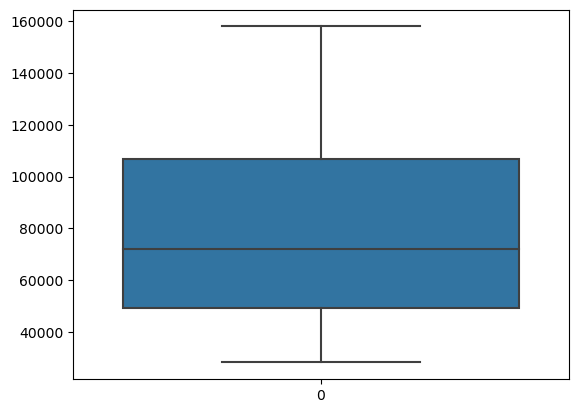

In [15]:
sns.boxplot(df['Price(₹)'])

In [16]:
df['Price(₹)'].skew()

0.48435574294988426

In [17]:
df.reset_index(drop=True)

,Model Name,Rating,ROM,Display (cm),Chip Processor,Number of Ratings,Number of Reviews,Price(₹)
0,"APPLE iPhone 11 (Black, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
1,"APPLE iPhone 11 (White, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
2,"APPLE iPhone 13 (Midnight, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
3,"APPLE iPhone 13 (Green, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
4,"APPLE iPhone 11 (Black, 64 GB)",4.6,64,15.49,A13,200360.0,11406.0,37999
...,...,...,...,...,...,...,...,...
372,"APPLE iPhone 12 mini (Purple, 64 GB)",4.5,64,13.72,A14,129311.0,10267.0,50999
373,"APPLE iPhone 12 Pro Max (Silver, 256 GB)",4.5,256,17.02,A14,1270.0,103.0,129900
374,"APPLE iPhone 11 Pro (Space Grey, 64 GB)",4.6,64,14.73,A13,8676.0,629.0,106600
375,"APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)",4.5,128,17.02,A14,1270.0,103.0,95599


In [18]:
df

,Model Name,Rating,ROM,Display (cm),Chip Processor,Number of Ratings,Number of Reviews,Price(₹)
0,"APPLE iPhone 11 (Black, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
1,"APPLE iPhone 11 (White, 128 GB)",4.6,128,15.49,A13,200360.0,11406.0,40999
2,"APPLE iPhone 13 (Midnight, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
3,"APPLE iPhone 13 (Green, 128 GB)",4.7,128,15.49,A15,255205.0,12592.0,56999
4,"APPLE iPhone 11 (Black, 64 GB)",4.6,64,15.49,A13,200360.0,11406.0,37999
...,...,...,...,...,...,...,...,...
397,"APPLE iPhone 12 mini (Purple, 64 GB)",4.5,64,13.72,A14,129311.0,10267.0,50999
398,"APPLE iPhone 12 Pro Max (Silver, 256 GB)",4.5,256,17.02,A14,1270.0,103.0,129900
399,"APPLE iPhone 11 Pro (Space Grey, 64 GB)",4.6,64,14.73,A13,8676.0,629.0,106600
405,"APPLE iPhone 12 Pro Max (Pacific Blue, 128 GB)",4.5,128,17.02,A14,1270.0,103.0,95599
